In [1]:
import PIL
import os
import numpy as np
import pandas as pd

path = os.listdir('/Users/a447771/Library/CloudStorage/OneDrive-UniversityofBradford/year3/FYP/python/7kdata_original/Training')
classes = {'glioma':0, 'meningioma':1, 'notumor':2, 'pituitary':3}

In [2]:
# data loading using cv2 library, resizing images
import cv2
X = []
Y = []
for cls in classes:
    pth = '/Users/a447771/Library/CloudStorage/OneDrive-UniversityofBradford/year3/FYP/python/7kdata_original/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)                
        if img is None:
            print('Wrong path:', path)
        else:
            img = cv2.resize(img,(150,150),fx=0,fy=0, interpolation = cv2.INTER_CUBIC) 
        X.append(img)
        Y.append(classes[cls])

In [3]:
X = np.array(X)
Y = np.array(Y)

In [4]:
X.shape

(5712, 150, 150)

In [5]:
Y.shape

(5712,)

In [6]:
print(type(X))
print (X.dtype)

<class 'numpy.ndarray'>
uint8


In [7]:
np.unique(Y)

array([0, 1, 2, 3])

In [8]:
pd.Series(Y).value_counts()

2    1595
3    1457
1    1339
0    1321
Name: count, dtype: int64

In [9]:
def plot_random(X, num = 3):
    random_img = X[np.random.choice(X.shape[0], num, replace = False)]   # generates random 3 images from X numpy array
    plt.figure(figsize=(8,3))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(random_img[i], cmap='grey')

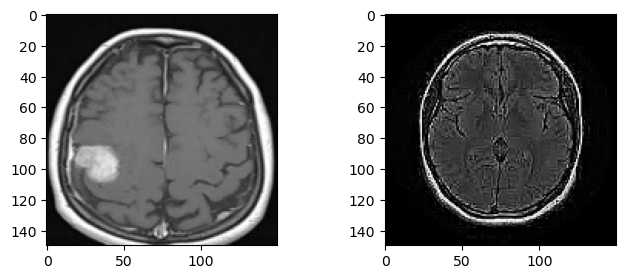

In [10]:
from matplotlib import pyplot as plt

plot_random(X, num = 2)

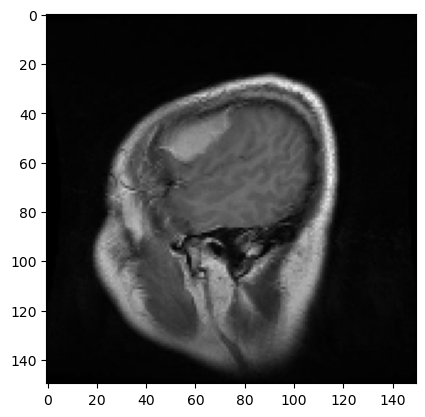

In [11]:
random_index = np.random.randint(len(X))
img1 = X[random_index]
plt.imshow(img1, cmap='grey')

In [12]:
from skimage.restoration import denoise_wavelet
# Apply Gaussian filter
denoised_gaussian = cv2.GaussianBlur(img1, (5, 5), 0)

# Apply Non-Local Means filter
denoised_nlmeans = cv2.fastNlMeansDenoising(img1, None, h=10, searchWindowSize=21, templateWindowSize=7)

# Apply wavelet denoising
denoised_wavelet = denoise_wavelet(img1) 

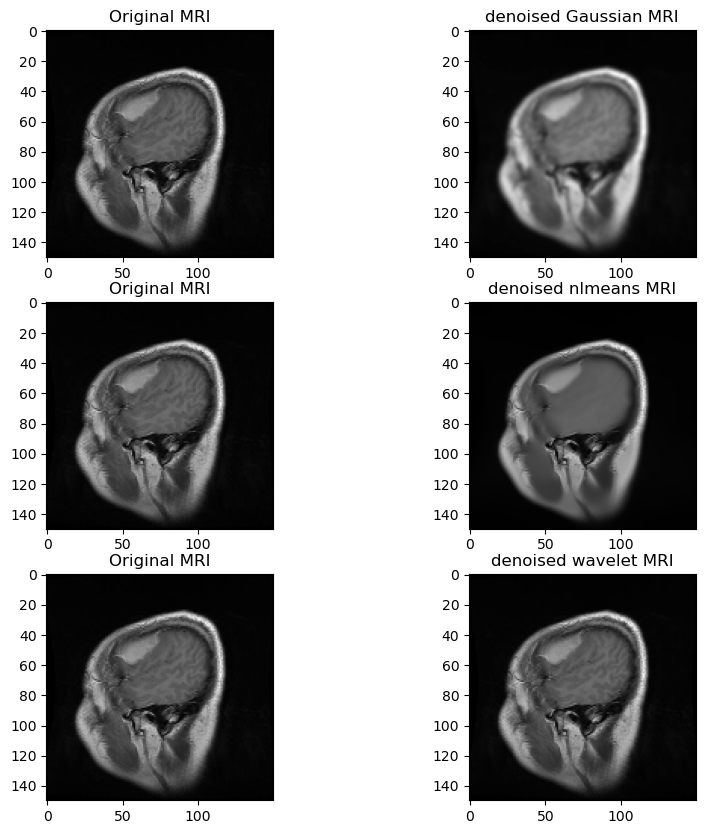

In [13]:
# Display the original and noisy images
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1), plt.imshow(img1, cmap='gray'), plt.title('Original MRI')
plt.subplot(3, 2, 2), plt.imshow(denoised_gaussian, cmap='gray'), plt.title('denoised Gaussian MRI')
plt.subplot(3, 2, 3), plt.imshow(img1, cmap='gray'), plt.title('Original MRI')
plt.subplot(3, 2, 4), plt.imshow(denoised_nlmeans, cmap='gray'), plt.title('denoised nlmeans MRI')
plt.subplot(3, 2, 5), plt.imshow(img1, cmap='gray'), plt.title('Original MRI')
plt.subplot(3, 2, 6), plt.imshow(denoised_wavelet, cmap='gray'), plt.title('denoised wavelet MRI')
plt.show()

In [14]:
from skimage.metrics import peak_signal_noise_ratio

def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

# Calculate PSNR for each denoised image
psnr_gaussian = calculate_psnr(img1, denoised_gaussian)
psnr_nlmeans = calculate_psnr(img1, denoised_nlmeans)
psnr_wavelet = calculate_psnr(img1, denoised_wavelet)

print(f'PSNR (Gaussian): {psnr_gaussian} dB')
print(f'PSNR (NLMeans): {psnr_nlmeans} dB')
print(f'PSNR (Wavelet): {psnr_wavelet} dB')

PSNR (Gaussian): 34.86395019876521 dB
PSNR (NLMeans): 37.81438540065051 dB
PSNR (Wavelet): 11.988951954762786 dB


In [15]:
# Apply Canny edge detector
edges_nlmeans = cv2.Canny(denoised_nlmeans, 50, 300)
edges_original = cv2.Canny(img1, 50, 300)

In [16]:
# Apply Sobel edge detector
sobel_x = cv2.Sobel(denoised_nlmeans, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(denoised_nlmeans, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

sobel_x1 = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=3)
sobel_y1 = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel1 = np.sqrt(sobel_x1**2 + sobel_y1**2)

(<Axes: title={'center': 'Sobel edges detection with nlmeans filter MRI'}>,
 Text(0.5, 1.0, 'Sobel edges detection with nlmeans filter MRI'))

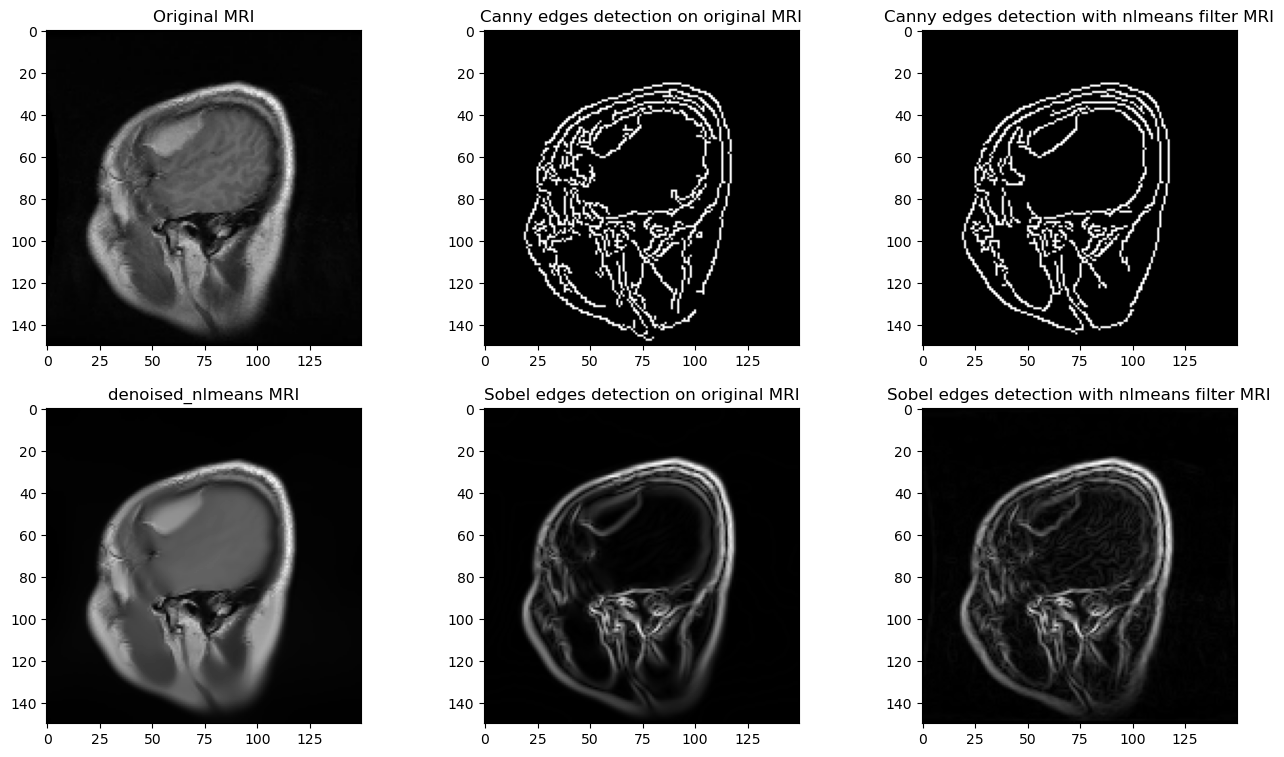

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1), plt.imshow(img1, cmap='grey'), plt.title('Original MRI')
plt.subplot(2,3,4), plt.imshow(denoised_nlmeans, cmap='grey'), plt.title('denoised_nlmeans MRI')
plt.subplot(2,3,3), plt.imshow(edges_nlmeans, cmap='grey'), plt.title('Canny edges detection with nlmeans filter MRI')
plt.subplot(2,3,2), plt.imshow(edges_original, cmap='grey'), plt.title('Canny edges detection on original MRI')
plt.subplot(2,3,5), plt.imshow(edges_sobel, cmap='grey'), plt.title('Sobel edges detection on original MRI')
plt.subplot(2,3,6), plt.imshow(edges_sobel1, cmap='grey'), plt.title('Sobel edges detection with nlmeans filter MRI')


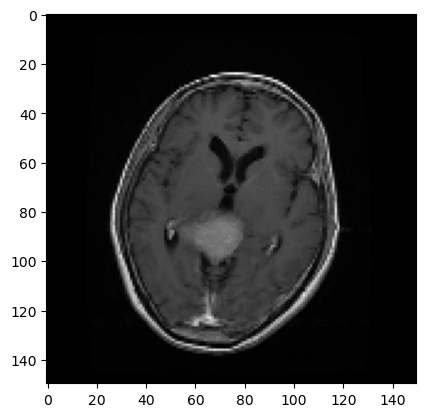

In [18]:
random_index = np.random.randint(len(X))
img2 =  X[random_index]
plt.imshow(img2, cmap='grey')

In [19]:
# Apply Non-Local Means filter
denoised_nlmeans2 = cv2.fastNlMeansDenoising(img2, None, h=10, searchWindowSize=21, templateWindowSize=7)

In [20]:
# Apply Canny edge detector
edges_nlmeans2 = cv2.Canny(denoised_nlmeans2, 50, 300)
edges_original2 = cv2.Canny(img2, 50, 300)

In [21]:
# Apply Sobel edge detector
sobel_x2 = cv2.Sobel(denoised_nlmeans2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y2 = cv2.Sobel(denoised_nlmeans2, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel22 = np.sqrt(sobel_x2**2 + sobel_y2**2)

sobel_x3 = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=3)
sobel_y3 = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel33 = np.sqrt(sobel_x3**2 + sobel_y3**2)

(<Axes: title={'center': 'Edges detection on original MRI'}>,
 Text(0.5, 1.0, 'Edges detection on original MRI'))

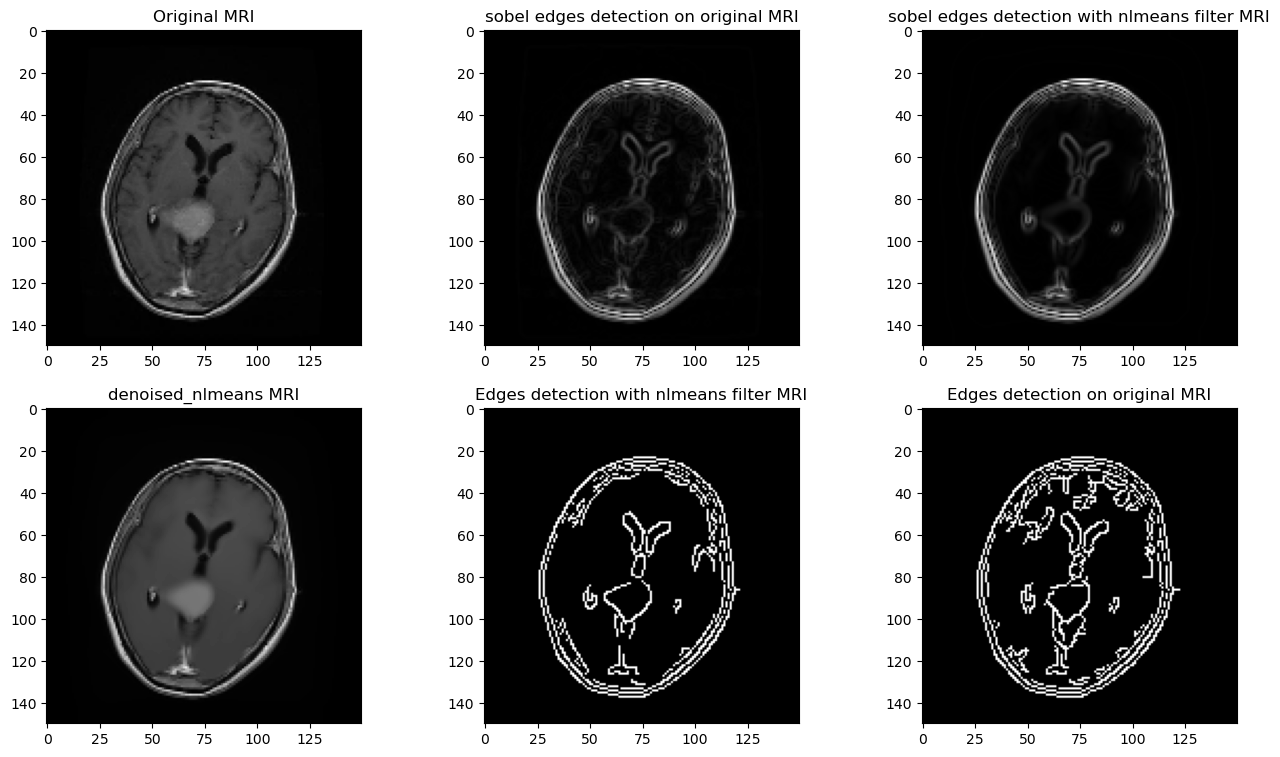

In [22]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1), plt.imshow(img2, cmap='grey'), plt.title('Original MRI')
plt.subplot(2,3,4), plt.imshow(denoised_nlmeans2, cmap='grey'), plt.title('denoised_nlmeans MRI')
plt.subplot(2,3,3), plt.imshow(edges_sobel22, cmap='grey'), plt.title('sobel edges detection with nlmeans filter MRI')
plt.subplot(2,3,2), plt.imshow(edges_sobel33, cmap='grey'), plt.title('sobel edges detection on original MRI')
plt.subplot(2,3,5), plt.imshow(edges_nlmeans2, cmap='grey'), plt.title('Edges detection with nlmeans filter MRI')
plt.subplot(2,3,6), plt.imshow(edges_original2, cmap='grey'), plt.title('Edges detection on original MRI')


# batch processing and saving into new directory as processed data

In [23]:
pwd

'/Users/a447771/Library/CloudStorage/OneDrive-UniversityofBradford/year3/FYP/python'

In [25]:
def process_images(source_dir, destination_dir):
    img_number = 1
    for root, dirs, files in os.walk(source_dir):
        for name in files:
            path = os.path.join(root, name)
            img = cv2.imread(path, 0)
            denoised_img = cv2.fastNlMeansDenoising(img, None, h=10, searchWindowSize=21, templateWindowSize=7)
            # Apply Sobel edge detector
            sobel_x = cv2.Sobel(denoised_img, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(denoised_img, cv2.CV_64F, 0, 1, ksize=3)
            edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
            class_name = os.path.basename(os.path.dirname(path))
            class_destination_dir = os.path.join(destination_dir, class_name)
            os.makedirs(class_destination_dir, exist_ok=True)
            cv2.imwrite(os.path.join(class_destination_dir, str(img_number) + ".jpg"), edges_sobel)
            img_number += 1

source_dirs = ["7kdata_original/Training/glioma", 
               "7kdata_original/Training/meningioma",
               "7kdata_original/Training/pituitary",
               "7kdata_original/Training/notumor"]

destination_dir = "processed_data_7k_2filters_4classes/Training"

for source_dir in source_dirs:
    process_images(source_dir, destination_dir)

In [26]:
source_testing_dirs = ["7kdata_original/Testing/glioma", 
               "7kdata_original/Testing/meningioma",
               "7kdata_original/Testing/pituitary",
               "7kdata_original/Testing/notumor"]

destination_testing_dir = "processed_data_7k_2filters_4classes/Testing"

for source_testing_dir in source_testing_dirs:
    process_images(source_testing_dir, destination_testing_dir)

In [27]:
source_positive_negative_dirs = ["dataset/230files/Testing/positive",
                                 "dataset/230files/Testing/negative"]
destination_positive_negative_dir = "processed_data_230files_2filters_2classes/Testin"

for source_positive_negative_dir in source_positive_negative_dirs:
    process_images(source_positive_negative_dir, destination_positive_negative_dir)

In [28]:
source_positive_negative_dirs = ["dataset/230files/Training/positive",
                                 "dataset/230files/Training/negative"]
destination_positive_negative_dir = "processed_data_230files_2filters_2classes/Trainin"

for source_positive_negative_dir in source_positive_negative_dirs:
    process_images(source_positive_negative_dir, destination_positive_negative_dir)